# Problem Set 1 - KNN
## CSCI 4622 - 2021 Fall

For today's assignment, we will be implementing our own K-Nearest Neighbors (KNN) algorithm.

*But Professor Quigley, hasn't someone else already written KNN before?*

Yes, you are not the first to implement KNN, or basically any algorithm we'll work with in this class. But
1. I'll know that you know what's really going on
2. You'll know you can do it, because
    1. someday you might have to implement some machine learning algorithm from scratch - maybe for a new platform (do you need to run python on your SmartToaster just to get it to learn how users like their toast?), maybe because you want to tweak the algorithm (there's always a better approach...),
    2. maybe because you're working on something important, and you need to control exactly what's on there (should you really be running anaconda on your secret spy plane?).

That said - we're not going to implement *everything*. We'll start by importing a few helper functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
import sklearn.neighbors
import sklearn.datasets
#additional imports:
import operator
import itertools
import random
from itertools import permutations
import math

In C:\Users\Tamer\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Tamer\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Tamer\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\Tamer\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Tamer\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

*Wait a minute - didn't we just import Scikit-learn (sklearn)? The package with baked-in machine learning tools?*

Yes - but it also has a ton of helper functions, including a dataset we'll be using later. But first, let's also create a dataset to play with and start working to build out our own classifier.

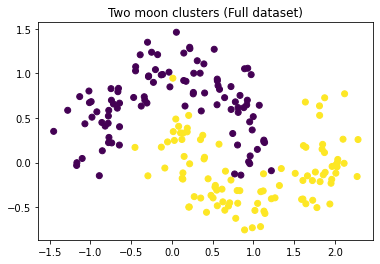

In [2]:
X, y = sklearn.datasets.make_moons(n_samples=200, noise=0.19, random_state=42)
X_train, y_train = X[:100], y[:100]
X_test, y_test = X[100:], y[100:]
plt.title("Two moon clusters (Full dataset)")
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

We have data!

Now, let's set up a KNNClassifier class. 

The KNNClassifier class will have similar design to the K-Nearest Neighbors classifier class from *scikit-learn*:
- Initialize the classifier with corresponding parameters (number of neighbors k)
- Fit the classifier using the training data
- Predict the class of new points `X_test`

We've written out a lot of the structure for you so it will be consistent and we can use / reuse it, and you can focus on the "important" stuff that actually relates to the machine learning itself.

In [3]:
class KNNClassifier:

    def __init__(self, k = 5):
        """
        Initialize our custom KNN classifier
        PARAMETERS

        k - the number of nearest neighbors to consider for classification
        """
        self._k = k
        self._model = None
        self._y = None
        self.label_to_index = None
        self.index_to_label = None
        self.counts = {}

    def fit(self, features, labels):
        """
        
        :param features: 2-D np.array of shape (number training samples, features dimension)
        :param labels: 1-D np.array of shape (number training samples,)
        :return: self
        """
        
        self._model = sklearn.neighbors.BallTree(features)
        self._y = labels
        self.counts = self.get_counts()
        # Should be used to map the classes to {0,1,..C-1} where C is the number of classes
        self.label_to_index = dict(zip(sorted(self.counts.keys()), range(len(self.counts))))
        self.index_to_label = dict(zip(range(len(self.counts)), sorted(self.counts.keys())))
        return self

    def get_counts(self):
        """
        Creates a dictionary storing the count of elements of each class
        :return: dict where the keys are the classes and values are the counts
        """

        counts_dic = dict()#updated dictionary name from counts to counts_dic
        #BEGIN Workspace 1.1
        #TODO: Modify aynd/or add to counts so that it returns a count of each answer class found in y
        labels =self._y
        unique, counts = np.unique(labels, return_counts=True)
        for i in range(len(unique)):
            counts_dic[unique[i]] = counts[i] 
            
        #END Workspace 1.1
        return counts_dic
        
    def majority_vote(self, indices):
        """
        Given indices, report the majority label of those points.
        FOR A TIE, report the most common label in the data set.
        :param indices: indices of training neighbors of shape (M, k) where k the classifier parameter
        :return: The majority label for each set of indices, shape (M,)
        """
        #BEGIN Workspace 1.2
        # TODO: Determine majority, assign it to labels
        labels = self._y
        sub_labels = [] # sub_labels contains label of each item in indices
        #find the label corrospoding to each index, add to sub_labels
        for i in indices:
            sub_labels.append(labels[i])
            
        unique_label = np.unique(labels)
        counts_dic = dict()
        #create dictionary of unique label, initilized counts as 0.
        for label in unique_label:
             counts_dic[label] = 0
                
        # loop over the labels inputted, update counts_dict with count of each label.
        for label in sub_labels: 
            counts_dic[label] = counts_dic[label] + 1
            
        #use max() function to find the highest label count.
        maximum = max(zip(counts_dic.values(), counts_dic.keys()))[0]
        labels =max(zip(counts_dic.values(), counts_dic.keys()))[1]

        # But the built in max() function will not notify me if there is more than one max so...
        # here is a funky way to check if more than one label have the same max count.
        maximum_counter = 0
        for label in counts_dic:
            if counts_dic[label] == maximum:
                maximum_counter = maximum_counter + 1
        
        # if we have more than one label with same count then
        if maximum_counter >1:
            #full_dic contains all and not a subset of the data, as instructed in the question.
            full_dic = self.counts
            #find which label has higher count
            labels = max(zip(full_dic.values(), full_dic.keys()))[1]
            #what if theres two or more labels with the same highest count in the entire data set?
            #tiebreak again here
            return labels
        
        # we enter else if there is only 1 label with highest count.
        else:
            return labels
        #END Workspace 1.2
        
        
    def predict(self, points):
        """
        Given new data points, classify them according to the training data provided in fit and number of neighbors k
        :param point: feature vectors (num_points, num_features)
        :return: 1-D np.array of predicted classes of shape (num_points,)
        """

        answer = []
        #BEGIN Workspace 1.3
        #TODO: perform classification of points here
        #HINT: use the majority function created above
        #HINT: use the euclidean distance discussed in lecture to find nearest neighbors
        model = self._model
        #dist, ind = model.query(points, k=self._k)#check on 1 and more data points.
        arr= model.get_arrays()
        other_points_list = arr[0]
        double_min_list = []
        for point in points:
            distance_list = []
            for index in range(len(other_points_list)):
                point_sum = 0
                for n in range(len(other_points_list[index])):
                    other_point = other_points_list[index]
                    point_sum = point_sum + (point[n] - other_point[n])**2
                distance_list.append((index,point_sum))
            min_list = []
            for k in range(self._k):
                minn = min(distance_list, key = lambda t: t[1])
                min_list.append(minn[0])
                distance_list.remove(minn)
            double_min_list.append(min_list)
        for index in double_min_list:#ind:
            ans=self.majority_vote(index)
            answer.append(ans)
        #END Workspace 1.3
        arr_answer = np.array(answer)
        return arr_answer

    def confusion_matrix(self,features_test, labels_test):
        unique_labels = np.unique(self._y)
        unique_labels_size=len(unique_labels)
        arr = np.ones((unique_labels_size,unique_labels_size))
        #print(arr)


        answer_dic = dict()
        for x in range(unique_labels_size):
            for y in range(unique_labels_size):
                answer_dic[(x,y)] =0
        
        prediction = self.predict(features_test)
        
        for index in range(len(features_test)):
            
            #count the diagonals in confusion matrix(true positives)
            answer_dic[(prediction[index],labels_test[index])] = answer_dic[(prediction[index],labels_test[index])]+1
                
        for x in range(unique_labels_size):
            for y in range(unique_labels_size):
                arr[x][y] =answer_dic[(x,y)]
        return arr

    def accuracy(self, features_test, labels_test):
        """
        Generate an accuracy score for the classifier based on the confusion matrix
        PARAMETERS
        C - an np.array of counts
        RETURN
        score - an accuracy score
        """
        score = 0
        #BEGIN Workspace 1.5
        #TODO: Compute accuracy of the classification of X_test
        matrix = self.confusion_matrix(features_test,labels_test)
        total = 0
        true_total = 0
        for x in range(len(matrix)):
            for y in range(len(matrix)):
                total = total + matrix[x][y]
                #case when prediction was correct
                if x == y:   
                    true_total =true_total +matrix[x][y]
        score = true_total/total
        #END Workspace 1.5
        return score


*But professor, this code isn't complete!*

### Problem 1: Complete our KNN Classifier - 40 Points

1.1 - Complete the `get_counts` function to return the count of each class found in the training set (5 points)

1.2 - Complete the `majority_vote` function to determine the majority class of a series of neighbors (10 points)

1.3 - Complete the `predict` function to capture the predicted class of a new datapoint (10 points)

 - HINT: Use the BallTree documentation to determine how to retrieve neighbors from the model (https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.BallTree.html#sklearn.neighbors.BallTree)

1.4 - Complete the `confusion_matrix` function to reveal the results of classification (5 points)

1.5 - Complete the `accuracy` function to get accuracy of the classifier based on a given test data (5 points)

Below, we'll be using our KNNClassifier (sent in as "model") to show how we would predict any points in space given the input data.

In [4]:
def show_decision_surface(model):
    """
    Helper function to visualize the decision surface of model
    :param model: Initialized KNNClassifier
    :return: None
    """
    x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
    y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
    x_grid = np.arange(x_min, x_max, 0.1)
    y_grid = np.arange(y_min, y_max, 0.1)
    xx, yy = np.meshgrid(x_grid, y_grid)
    r1, r2 = xx.reshape(-1,1), yy.reshape(-1,1)
    grid = np.hstack((r1,r2))
    y_hat = model.predict(grid)
    zz = y_hat.reshape(xx.shape)
    plt.contourf(xx, yy, zz, cmap='PiYG')
    plt.scatter(X[:,0], X[:,1], c=y)
    plt.show()

1.6. Try different values of k and report their accuracies and confusion matrices on the test set. Make sure to keep `random_state=42` so that the reported values don't change when code is re-run (5 points)

Counts:  {0: 51, 1: 49}
Confusion matrix: [[47.  1.]
 [ 2. 50.]]
accuracy:  0.97


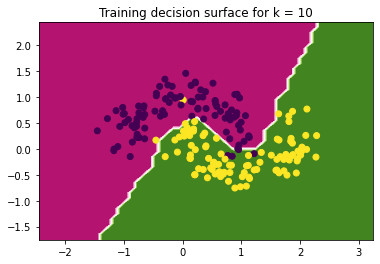

In [5]:
#BEGIN Workspace 1.6
#TODO: Try different Ks  
kk = 10
model = KNNClassifier(k=kk)
model = model.fit(X_train, y_train)
get_count = model.get_counts()
print('Counts: ',get_count)
test = model.confusion_matrix(X_test,y_test)
print('Confusion matrix:',test)
test = model.accuracy(X_test,y_test)
print('accuracy: ',test)
plt.title("Training decision surface for k = {}".format(kk))
show_decision_surface(model)
#END Workspace 1.6

In [6]:
for k in [1,3,5,7,10]:
    model = KNNClassifier(k=k)
    model = model.fit(X_train, y_train)
    test = model.confusion_matrix(X_test,y_test)
    print('Confusion matrix for k=',k,":")
    print(test)
    test = model.accuracy(X_test,y_test)
    print('accuracy for k=',k,':',test)
    print(" ")


Confusion matrix for k= 1 :
[[44.  3.]
 [ 5. 48.]]
accuracy for k= 1 : 0.92
 
Confusion matrix for k= 3 :
[[47.  2.]
 [ 2. 49.]]
accuracy for k= 3 : 0.96
 
Confusion matrix for k= 5 :
[[47.  1.]
 [ 2. 50.]]
accuracy for k= 5 : 0.97
 
Confusion matrix for k= 7 :
[[47.  1.]
 [ 2. 50.]]
accuracy for k= 7 : 0.97
 
Confusion matrix for k= 10 :
[[47.  1.]
 [ 2. 50.]]
accuracy for k= 10 : 0.97
 


#### Write up for 1.6 here:
Solution: We can clearly see from above that as k increases, the accuracy also increases. We can also see that the change in accuracy eventually stopped increasing as rapidly as k increased. accuracy is approaching 0.97 .

### Bonus (for the avid machine learner) (10 Points)
1.7. For which value of $k$ is the classifier consistent? (Only worry about this question within our `random_state=42` constraint)

1.8. Edit your `KNNClassifier` so that it's consistent for all $k$ (This solution should work beyond our `random_state=42` constraint, but retain the constraint when submitting your code above)

For a definition of a consistent classifier, refer to [Consistent Classification, Firm and Soft by Barum](https://proceedings.neurips.cc/paper/1996/file/7bb060764a818184ebb1cc0d43d382aa-Paper.pdf) (The answer is found in the abstract and introduction sections of the paper) 

#### Write up for the bonus
Solution 1.7: The classifier is consisntent for k=5. We can see from above that accuracy is appraching 0.97, which is first reached when k=5.

***
OK - now we've demonstrated that our KNN classifier works, let's think about our problem space! 

## Our Dataset - Identifying Digits from Images

It's a pretty common problem - just imagine working at the post office, and you're handed a hand-written check,
and you have to identify exactly what it says.
Did they pay 500 or 600 dollars? Is the letter going to 80309 (campus) or 30309 (Atlanta)?

Let's be a little smart about this - let's up some classes and helper functions to help us out.

### Problem 2: Implement KNN on Digits dataset - 30 Points

2.1 **Randomly** divide our digit dataset into training and testing sets (10 Points)

2.2 Report the number of examples in training and testing, as well as measuring then number of pixels in each image (10 points)

2.3 Create a confusion matrix of our classifier for K = 5 (10 points) *HINT: Doing this may cause you to catch mistakes in your classifier. Go fix those!*

In [8]:

class Numbers:
    def __init__(self,k):
        #load data from sklearn
        
        data = sklearn.datasets.load_digits()
        features = data["data"]
        self.labels = data["target"]
        self.features = features.reshape(features.shape[0], -1)
        self.classifier = KNNClassifier(k)
        # BEGIN Workspace 2.1  
        
        #Lets divide our data points approximitaly 80/20
        #I implemented the below code to find out the proper sizes which will help in initialization
        
        #length of rows and columns
        total,col_len= self.features.shape
        #find out the numbers which divides our data into 80/20 (approximitly)
        size_train = math.floor(total *.8)
        size_test = math.ceil(total*.2)
        
        #index_lst: a list that contains indexes of our 2d data.
        #used as an input tp np.random.choice to randomly select a data point (or its index more accurtly) 
        index_lst = [index for index in range(total)]
        
        # I found it easier to append data into lists instead of arrays,
        # the below list will be converted to arrays at the end.
        x_train,x_test,y_train, y_test = [],[],[],[]

        #Lets randomly select our training data
        for i in range(size_train):        
            #randomly select an index
            choice = np.random.choice(index_lst)
            #Once we randomly select an index, append its element to the proper list.
            x_train.append(self.features[choice])
            y_train.append(self.labels[choice])
            # Manually remove the selected index so its not picked again
            index_lst.remove(choice)
        for i in range(size_test):
            #randomly select an index
            choice = np.random.choice(index_lst)
            #Once we randomly select an index, append its element to the proper list.
            x_test.append(self.features[choice])
            y_test.append(self.labels[choice])
            # Manually remove the selected index so its not picked again
            #index_lst better have length 0 at the end of the second loop.
            index_lst.remove(choice)
            
        #convert the resulted lists into arrays and add them to proper variables.
        self.train_x =np.array(x_train)
        self.train_y = np.array(y_train)
        self.test_x = np.array(x_test)
        self.test_y = np.array(y_test)
        #END Workspace 2.1
        
    def report(self):
        """
        Report information about the dataset using the print() function
        """
        #BEGIN Workspace 2.2
        #TODO: Create printouts for reporting the size of each set and the size of each datapoint
        print('train_x size =',len(self.train_x))
        print('train_y size =',len(self.train_y))
        print('test_x size =',len(self.test_x))
        print('test_y size =',len(self.test_y))
        print('Number of pixels in image:',self.test_x[1].size)
        #END Workspace 2.2

   
    def classify(self):
        """
        Fits classifier using the training data and generate a confusion matrix for the test data
        then return the confusion matrix
        """
        #BEGIN Workspace 2.3.a
        #TODO: Create classifier from training data, generate confusion matrix for test data
        model = self.classifier.fit(self.train_x,self.train_y)
        c_matrix = model.confusion_matrix(self.test_x,self.test_y)
        #END Workspace 2.3.a
        #c_matrix = None
        return  c_matrix
        
    
    
    def accuracy(self):
        c_matrix = self.classify()
        accuracy = 0
        #BEGIN Workspace 2.3.b
        #TODO: Compute accuracy using confusion matrix
        total = 0
        true_total = 0
        for x in range(len(c_matrix)):
            for y in range(len(c_matrix)):
                total = total + matrix[x][y]
                if x == y:   
                    true_total =true_total +matrix[x][y]
        accuracy = true_total/total        
        #END Workspace 2.3.b
        
        return accuracy

    def view_digit(self, index):
        """
        Display an image of a digit
        PARAMETERS
        digitImage - a data object from the dataset
        """
        #TODO: process digit_image to matrix "image"
        digit_image = self.features[index]
        image = digit_image.reshape(8, -1)
        print("Image for digit {}".format(self.labels[index]))
        plt.matshow(image)
        plt.show()
    
#@staticmethod
def display_confusion(c_matrix):
    fig, ax = plt.subplots()
    ax.matshow(c_matrix, cmap=plt.cm.Blues)
    for i in range(c_matrix.shape[0]):
        for j in range(c_matrix.shape[0]):
            ax.text(i, j, str(c_matrix[j,i]), va='center', ha='center')
    plt.show()
        

train_x size = 1437
train_y size = 1437
test_x size = 360
test_y size = 360
Number of pixels in image: 64
Accuracy:  0.975


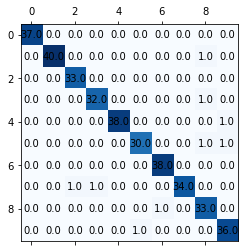

In [9]:
numbers = Numbers(5)
numbers.report()
matrix = numbers.classify()
print('Accuracy: ',numbers.accuracy())
display_confusion(matrix)


*Wow, I can't believe we just created a KNN Classifier for multiple classes - but can't we make it better?*

Yes, we saw above that our classifier didn't work perfectly. Let's explore that issue a little further by turning the $K$ and random split knobs

### Problem 3: Improving KNN on Digits - 30 Points

3.1 Determine which classes are most often confused (from our confusion matrix above), inspect some examples of these digits (using the `view_digit` function in our Numbers class), and write a brief (4 - 5 sentences) description of why you think these particular numbers may be misclassified. (10 pts)

3.2 Explore the influence of the number of nearest neighbors (i.e. try changing our K). Plot the relationship between K and accuracy, and write a brief (4 - 5 sentences) description of how this factor impacts our accuracy. To mitigate the effect of randomness from the split, you have to run the evaluation multiple times and report the mean accuracy. Make sure the runs for different Ks are done on the same splits. (10 pts)

3.3 Explore the influence of the train / test split of our data (i.e. copy our Numbers class into Numbers2 below and try changing the split for our dataset). Plot the relationship between the split % and accuracy, and write a brief (4 - 5 sentences) description of its impact. (10 pts)

You can complete the `NumbersKnobs` class and use it as you see fit. But it's only necessary for 3.3

### Solution 3.1:
Some of the classes that most often get confused:

 1) digits 6 and 8: These two numbers look very similar. The only difference is that the number 6 is missing a tiny piece of its top left 'corner'.
 
 2)digits 1 and 4: these two numbers argueably look similar. Both has a veritcal yellow line in the center.
 


Image for digit 8


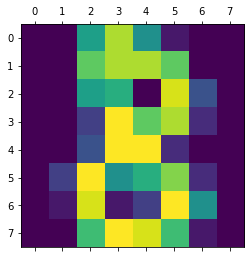

Image for digit 6


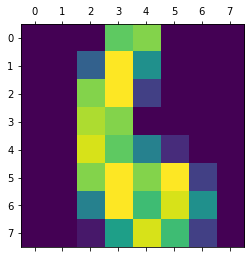

In [10]:
#BEGIN 3.1a
#TODO: Print out problem class image
numbers.view_digit(8)
numbers.view_digit(6)
#END 3.1a

In [11]:
#BEGIN 3.2a
#TODO: Run evaluation for different K and plot K vs Accuracy
accuracy = []
kk = [k for k in range(1,12)]
for k in kk:
    numbers = Numbers(k)
    test = numbers.classify()
    accuracy.append(numbers.accuracy())

#END 3.2a

Text(0.5, 1.0, 'k vs accuracy')

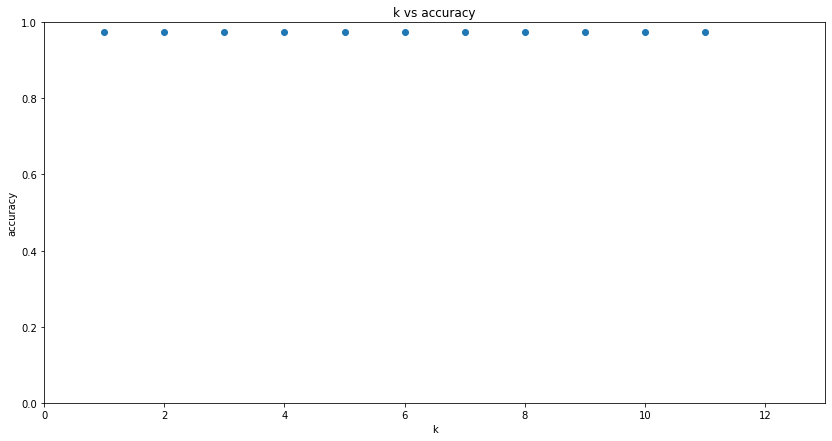

In [12]:
fig, ax=  plt.subplots(figsize=(14,7))
plt.scatter(kk, accuracy)
plt.axis([0, 13, 0, 1])
ax.set_xlabel('k')
ax.set_ylabel('accuracy')
plt.title('k vs accuracy')

#### 3.2b
As K increases, the  slightly accuracy also incraeses. Particualary the accuracy changes from .0973 to .0977). After it reaches k=10, the change in accurancy stabalize. It is difficult to tell from the plot because the y axis is not centering well around the data.

In [102]:

class NumbersKnobs(Numbers):
    """ Inherits from Numbers, so feel free to use methods from Numbers
    """

    def __init__(self, k=5, train_ratio=0.8):
        #load data from sklearn
        self._k = k
        self.train_ratio = train_ratio
        
        data = sklearn.datasets.load_digits()
        features = data["data"]
        labels = data["target"]
        features = features.reshape(features.shape[0], -1)

        #BEGIN Workspace 3.3a
        self.train_x = np.array(None) # A 2D np.array of training examples, REPLACE
        self.train_y = np.array(None) # A 1D np.array of training answers, REPLACE
        self.test_x = np.array(None) # A 2D np.array of testing examples, REPLACE
        self.test_y = np.array(None) # A 1D np.array of testing answers, REPLACE
        self.classifier = KNNClassifier(k)
        
        # TODO: - Divide our dataset into Train and Test datasets (80/20 split),
        #        replacing the variables above
        #       - Initialize the classifier
        #TODO: Divide our dataset into Train and Test datasets (using trainPercentage), replacing the variables above
        #HINT: You should be able to mostly copy your own work from the original Numbers class
        
        #Lets divide our data points approximitaly 80/20
        #I implemented the below code to find out the proper sizes which will help in initialization
        
        #length of rows and columns
        total,col_len= features.shape
        #find out the numbers which divides our data into 80/20 (approximitly)
        size_train = math.floor(total *train_ratio)
        size_test = math.ceil(total* (1- train_ratio))
        
        #index_lst: a list that contains indexes of our 2d data.
        #used as an input tp np.random.choice to randomly select a data point (or its index more accurtly) 
        index_lst = [index for index in range(total)]
        
        # I found it easier to append data into lists instead of arrays,
        # the below list will be converted to arrays at the end.
        x_train,x_test,y_train, y_test = [],[],[],[]

        #Lets randomly select our training data
        for i in range(size_train):        
            #randomly select an index
            choice = np.random.choice(index_lst)
            #Once we randomly select an index, append its element to the proper list.
            x_train.append(features[choice])
            y_train.append(labels[choice])
            # Manually remove the selected index so its not picked again
            index_lst.remove(choice)
        for i in range(size_test):
            #randomly select an index
            choice = np.random.choice(index_lst)
            #Once we randomly select an index, append its element to the proper list.
            x_test.append(features[choice])
            y_test.append(labels[choice])
            # Manually remove the selected index so its not picked again
            #index_lst better have length 0 at the end of the second loop.
            index_lst.remove(choice)
            
        #convert the resulted lists into arrays and add them to proper variables.
        self.train_x =np.array(x_train)
        self.train_y = np.array(y_train)
        self.test_x = np.array(x_test)
        self.test_y = np.array(y_test)
        #END Workspace 3.3a


0.5: 0,1,2,3,4,
0.6: 0,1,2,3,4,
0.7: 0,1,2,3,4,


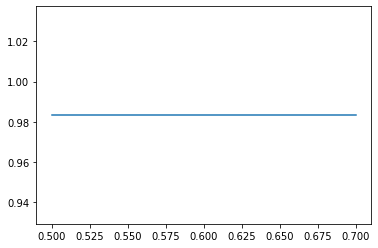

In [103]:
#BEGIN Workspace 3.3b
#TODO: analyze the effect of split ratio
k = 5
repetitions = 5 # Feel free to increase it
split_ratios = np.array([0.5, 0.6, 0.7])
results = np.zeros((len(split_ratios),repetitions))
for i, s in enumerate(split_ratios):
    print(s ,end =": ")
    for j in range(repetitions):
        print(j, end=",")
        numbers = NumbersKnobs(k=k, train_ratio=s)
        results[i,j] = numbers.accuracy() # TODO get accuracy of classification
    print("")
# Add title axis labels to the plot
plt.plot(split_ratios, results.mean(1))

#END Workspace 3.3b

#### 3.3b
TODO:plotting ratio % vs accurcy represents a horizontal line.Which means we are getting pretty much the same accuracy for multiple split ratios. That gives us more confidence that our classifier is doing what it is supposed to do.  